# Patch Analyzer

We will use this notebook to analyze all patches generated by our experiments.
This data has been previously condensed into a csv file with the use of Utils.ipynb.

The corresponding file lives on results/smartbugs/data_analysis/all_patches_stats.csv 

In [1]:
source_code_tools=[
    'sGuard', 
    'sGuardPlus',
    'SmartFix', 
    "SolGPT" ,
    'TIPS', 
]
bytecode_tools = [
    'Elysium', 
    'SmartShield', 
]
tools = source_code_tools + bytecode_tools
Columns=['Patch','Original','Category','Tool','DIFF','COMP', 'Detected','Fixed','Consistent','functional_check','mitigates','patch_link', 'original_link', 'diff_link', 'exploit_link']

In [2]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#collecting contracts name
dataset='smartbugs/data_analysis/'
results_path='../results/'
contracts_path=os.path.join(results_path,dataset,'contracts.csv')
storage_path=os.path.join(results_path,dataset)

# Load the contracts data
contracts_df = pd.read_csv(contracts_path)

vulnerabilities=contracts_df["Category"].unique().tolist()
contract_names=contracts_df["Name"].unique().tolist()

result_df= pd.read_csv(os.path.join(results_path,dataset,"all_patches_stats.csv"), usecols=Columns)


In [3]:
result_df.head()

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,Consistent,functional_check,mitigates,patch_link,original_link,diff_link,exploit_link
0,arbitrary_location_write_simple.bin,arbitrary_location_write_simple.sol,access_control,Elysium,True,NaN,0.0,0.0,False,failed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...
1,incorrect_constructor_name1.bin,incorrect_constructor_name1.sol,access_control,Elysium,True,NaN,1.0,1.0,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...
2,incorrect_constructor_name2.bin,incorrect_constructor_name2.sol,access_control,Elysium,True,NaN,1.0,1.0,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...
3,incorrect_constructor_name3.bin,incorrect_constructor_name3.sol,access_control,Elysium,True,NaN,1.0,1.0,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...
4,mapping_write.bin,mapping_write.sol,access_control,Elysium,True,NaN,1.0,1.0,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...


In [4]:
# Example of a search
# To find patches for a specific contract and tool, you can filter the DataFrame like this:
# Example: Find patches for 'reentrancy_simple.sol' using 'Elysium'
result_df[(result_df['Original'] == 'reentrancy_simple.sol') & (result_df['Tool'] == 'Elysium')]

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,Consistent,functional_check,mitigates,patch_link,original_link,diff_link,exploit_link
60,reentrancy_simple.bin,reentrancy_simple.sol,reentrancy,Elysium,True,NaN,1.0,1.0,True,failed,NaN,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...


In [5]:
# Example of counting the number of patches per tool that mitigate exploits
# Count the number of mitigated exploits for Elysium
result_df[(result_df['Tool'] == 'Elysium') & (result_df['mitigates'] == 'yes')].groupby('Category').size()

Category
access_control               8
arithmetic                   7
bad_randomness               3
front_running                1
time_manipulation            2
unchecked_low_level_calls    8
dtype: int64

In [6]:
# Dataset has one duplicated contract that appears on two different categories
result_df[result_df['Original']=='0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol'].head() #duplicate case

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,Consistent,functional_check,mitigates,patch_link,original_link,diff_link,exploit_link
49,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.bin,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol,reentrancy,Elysium,True,NaN,1.0,1.0,True,non-exploitable,non-exploitable,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,non-exploitable
83,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.bin,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol,unchecked_low_level_calls,Elysium,True,NaN,0.0,0.0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...
143,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol,reentrancy,sGuard,True,True,6.0,0.0,False,non-exploitable,non-exploitable,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,non-exploitable
207,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol,unchecked_low_level_calls,sGuard,True,True,0.0,0.0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...
325,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol,0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol,unchecked_low_level_calls,SmartFix,True,True,0.0,0.0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...


# Now we turn the data per patch into per contract

In [73]:
def turn_to_per_contract(df,tools,column):
    """
    Transforms the DataFrame to a per-contract format, adding columns for each tool.
    Args:
        df (DataFrame): The input DataFrame containing patches.
        tools (list): List of tools to create columns for.
        column (str): The column name to check for True values.
    Returns:
        DataFrame: A new DataFrame with each contract and tool columns.
    """
    per_contract=pd.read_csv(contracts_path)
    del per_contract['Occurrences'] 
    del per_contract['Lines'] 
    values=df.values.tolist()
    
    for tool in tools:
        per_contract[tool]=''
        for line in values:
            line_tool=line[3]
            if line_tool==tool:
                patch=line[0]
                original=line[1]
                category=line[2]
                goal = True
                value=line[list(df.keys()).index(column)]
                if column=='functional_check':

                    compare= value == 'passed' or value == 'non-exploitable'
                    # Find the corresponding contract and category
                    find = (per_contract['Name'] == original) & (per_contract['Category'] == category)

                    # Update the tool column based on the patch's status
                    if find.any():
                        current_status = per_contract.loc[find, line_tool].iloc[0]
                        if value == "passed":
                            per_contract.loc[find, line_tool] = "passed"  # Highest priority
                        elif value == "non-exploitable" :
                            per_contract.loc[find, line_tool] = "non-exploitable"  # Second priority
                        elif value == "failed" and current_status not in ["passed"]:
                            per_contract.loc[find, line_tool] = "failed"  # Lowest priority
                    continue

                if column=='mitigates':
                    goal= 'yes'
                compare= value == goal
                if compare:
                    find= (per_contract['Name']==original) & (per_contract['Category']==category) 
                    per_contract.loc[find, tool] = value

    
    return per_contract
        

In [8]:
def turn_to_per_contract_dfm(df,tools,column):
    """
    Transforms the DataFrame to a per-contract format, adding columns for each tool.
    Args:
        df (DataFrame): The input DataFrame containing patches.
        tools (list): List of tools to create columns for.
        column (str): The column name to check for True values.
    Returns:
        DataFrame: A new DataFrame with each contract and tool columns.
    """
    per_contract=pd.read_csv(contracts_path)
    del per_contract['Occurrences'] 
    del per_contract['Lines'] 
    values=df.values.tolist()
    for tool in tools:
        per_contract[tool]=''
        for line in values:
            line_tool=line[3]
            if line_tool==tool:
                patch=line[0]
                original=line[1]
                category=line[2]
                value=line[list(df.keys()).index(column)]
                find= (per_contract['Name']==original) & (per_contract['Category']==category) 
                if value>0:
                    bool_value= value>0 #means if fixed,detected, or 
                    per_contract.loc[find, tool] = bool_value
    
    return per_contract

In [9]:
# Example of transforming the DataFrame to a per-contract format for 'Detected'
# Partial results of RQ2:
print('RQ2: To what extend do APR tools DETECT the originally labeled vulnerabilities?')
per_c_detected=turn_to_per_contract_dfm(result_df,tools,'Detected')
per_c_detected[tools][per_c_detected==True].count()

RQ2: To what extend do APR tools DETECT the originally labeled vulnerabilities?


sGuard         35
sGuardPlus     70
SmartFix       51
SolGPT         97
TIPS           82
Elysium        52
SmartShield    59
dtype: int64

In [10]:
# Example of transforming the DataFrame to a per-contract format for 'Generated'
# Partial results of RQ2:
print('RQ2: To what extend do APR tools GENERATE patches for the smartbugs curated dataset?')
generated_temp_df=result_df.copy()
# we want to get the generated patch, so replace the name for true and count instances
generated_temp_df['Patch']=True
per_c_generated=turn_to_per_contract(generated_temp_df,tools,'Patch')
per_c_generated[tools][per_c_generated==True].count()

RQ2: To what extend do APR tools GENERATE patches for the smartbugs curated dataset?


sGuard         109
sGuardPlus      81
SmartFix        86
SolGPT         139
TIPS           140
Elysium        121
SmartShield    135
dtype: int64

In [11]:
# Example of transforming the DataFrame to a per-contract format for 'COMP'
# Partial results of RQ2:
print('RQ2: To what extend do APR tools generate patches that COMPILE?')
per_c_comp=turn_to_per_contract(result_df,tools,'COMP')
per_c_comp[tools][per_c_comp==True].count()

RQ2: To what extend do APR tools generate patches that COMPILE?


sGuard         108
sGuardPlus      81
SmartFix        86
SolGPT         138
TIPS           138
Elysium          0
SmartShield      0
dtype: int64

In [12]:
# Example of transforming the DataFrame to a per-contract format for 'DIFF'
# Partial results of RQ2:
print('RQ2: To what extend do APR tools generate patches that are different from the original contract?')
per_c_diff=turn_to_per_contract(result_df,tools,'DIFF')
per_c_diff[tools][per_c_diff==True].count()

RQ2: To what extend do APR tools generate patches that are different from the original contract?


sGuard          62
sGuardPlus      81
SmartFix        86
SolGPT         139
TIPS           140
Elysium         95
SmartShield    135
dtype: int64

### This moves on into getting a DataFrame of so called  "valid patches"

A valid patch is a patch that compiles (if coming from source code tool) and is different from the original contract



In [13]:
import numpy as np
only_valid_patches=result_df.copy()
cond1 = result_df['Tool'].isin(source_code_tools) & (result_df['COMP']==True)& (result_df['DIFF']==True)
cond2 = result_df['Tool'].isin(bytecode_tools) & (result_df['DIFF'] ==True)
only_valid_patches['Valid Patches'] = np.where(cond1 | cond2, True, False)
only_valid_patches= only_valid_patches[only_valid_patches['Valid Patches']==True]
only_valid_patches

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,Consistent,functional_check,mitigates,patch_link,original_link,diff_link,exploit_link,Valid Patches
0,arbitrary_location_write_simple.bin,arbitrary_location_write_simple.sol,access_control,Elysium,True,NaN,0.0,0.0,False,failed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
1,incorrect_constructor_name1.bin,incorrect_constructor_name1.sol,access_control,Elysium,True,NaN,1.0,1.0,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
2,incorrect_constructor_name2.bin,incorrect_constructor_name2.sol,access_control,Elysium,True,NaN,1.0,1.0,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
3,incorrect_constructor_name3.bin,incorrect_constructor_name3.sol,access_control,Elysium,True,NaN,1.0,1.0,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
4,mapping_write.bin,mapping_write.sol,access_control,Elysium,True,NaN,1.0,1.0,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,NaN,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,multiowned_vulnerable.sol,multiowned_vulnerable.sol,access_control,TIPS,True,True,0.0,0.0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
1322,mapping_write.sol,mapping_write.sol,access_control,TIPS,True,True,0.0,0.0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
1323,wallet_03_wrong_constructor.sol,wallet_03_wrong_constructor.sol,access_control,TIPS,True,True,0.0,0.0,False,passed,no,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True
1324,mycontract.sol,mycontract.sol,access_control,TIPS,True,True,1.0,1.0,True,passed,yes,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/smartbugs/smartbugs-curated...,https://github.com/ASSERT-KTH/RepairComp/blob/...,https://github.com/ASSERT-KTH/sb-heists/tree/m...,True


### This moves on into calculating consistency of each tool 
For patches that compile, and are different we consider what is the consistency of tools.
A cosnsitent patch means that number of detected vulnerabilities on the original contract is lower compare to the oned in the fixed patch.

In [14]:

# Calculating the Difference between the detection amount on original and the patch, only for valid patches (the interesting ones)
only_valid_patches['Difference'] = only_valid_patches['Detected'] - only_valid_patches['Fixed']

# next step is relevant as 2 tools generate multiple patches for the same contract, so we need to select the best one
#selecting the ones with the lowest Differences (particularly for multi generated patches tools)

best_patches_idx = only_valid_patches.groupby(['Original','Category', 'Tool'])['Difference'].idxmin().dropna()
best_patches_df = only_valid_patches.loc[best_patches_idx].reset_index(drop=True)

# sanity check: every tool has at least one patch
for tool in tools:
    assert(len(best_patches_df[(best_patches_df['Tool']==tool)].values.tolist()))>0

# consistent contracts

per_c_consistent=contracts_df.copy()
per_c_consistent.drop(['Occurrences', 'Lines'], axis=1, inplace=True)
for tool in tools:
    per_c_consistent[tool] = per_c_consistent.apply(
    lambda row: any(
        (best_patches_df['Original'] == row['Name']) & 
        (best_patches_df['Category'] == row['Category']) & 
        (best_patches_df['Tool'] == tool) &
        (best_patches_df['Difference'] == 0)&
        (best_patches_df['Detected'] > 0)

    ), axis=1
)

#consistent.to_csv(os.path.join(storage_path,'consistent_contracts.csv'), index=False)

# Example of transforming the DataFrame to a per-contract format for 'Consistent'
print('RQ2: To what extend do APR tools generate patches that are CONSISTENT in their detection?')

per_c_consistent[tools][per_c_consistent==True].count()

RQ2: To what extend do APR tools generate patches that are CONSISTENT in their detection?


sGuard          2
sGuardPlus     70
SmartFix       48
SolGPT         88
TIPS           81
Elysium        52
SmartShield    38
dtype: int64

# Gathering all results on RQ2 Table

On Rq2 we look into:
Detection, Generation, Compilable, Different, Consistent

In [15]:
# Gattering per_c dataframes and their count of contracts per tool

per_c_dfs = {
    'Detected': per_c_detected[tools][per_c_detected==True].count(),
    'Generated': per_c_generated[tools][per_c_generated==True].count(),
    'COMP': per_c_comp[tools][per_c_comp==True].count(),
    'DIFF': per_c_diff[tools][per_c_diff==True].count(),
    'Consistent': per_c_consistent[tools][per_c_consistent==True].count()
}
# Convert the dictionary to a DataFrame for better visualization
per_c_summary = pd.DataFrame(per_c_dfs).reset_index().rename(columns={'index': 'Tool'})
# generate a summary table
per_c_summary['Tool'] = per_c_summary['Tool'].str.replace('_', ' ').str.title()
# Display the summary DataFrame
print(per_c_summary)



          Tool  Detected  Generated  COMP  DIFF  Consistent
0       Sguard        35        109   108    62           2
1   Sguardplus        70         81    81    81          70
2     Smartfix        51         86    86    86          48
3       Solgpt        97        139   138   139          88
4         Tips        82        140   138   140          81
5      Elysium        52        121     0    95          52
6  Smartshield        59        135     0   135          38


# Gathering exploit results for RQ3 Table

In [79]:
# get the number of failed functional checks
per_c_functional_checks=turn_to_per_contract(only_valid_patches,tools,'functional_check')
print('RQ3: To what extend do APR tools generate patches that failed the FUNCTIONAL CHECK?')
per_c_functional_checks[tools][(per_c_functional_checks=='failed')  ].count()


RQ3: To what extend do APR tools generate patches that failed the FUNCTIONAL CHECK?


sGuard          1
sGuardPlus      0
SmartFix        4
SolGPT          6
TIPS            1
Elysium        26
SmartShield    21
dtype: int64

In [74]:
# get the number of failed functional checks
per_c_mitigates=turn_to_per_contract(only_valid_patches,tools,'mitigates')
print('RQ3: To what extend do APR tools generate patches that MITIGATES Exploits?')
per_c_mitigates[tools][(per_c_mitigates=='yes')  ].count()


RQ3: To what extend do APR tools generate patches that MITIGATES Exploits?


sGuard         30
sGuardPlus     44
SmartFix       48
SolGPT         67
TIPS           45
Elysium        29
SmartShield    26
dtype: int64

# Gathering results for RQ4
TABLE V: RQ4: Mitigation effectiveness per vulnerability type, tool and contract in dataset SmartBugs-Curated

In [77]:
# we study the number per vulnerability that is mitigated, into a df and then print a table
mitigation_per_vulnerabilities_per_tool = {}
for tool in tools:
    mitigation_per_vulnerabilities_per_tool[tool] = per_c_mitigates[per_c_mitigates[tool] == 'yes'].groupby('Category')[tool].count()
# Print the results in a table format
print("\nRQ3: Number of mitigated exploits per tool and vulnerability category:")
mitigation_df = pd.DataFrame(mitigation_per_vulnerabilities_per_tool).fillna(0).astype(int)
mitigation_df



RQ3: Number of mitigated exploits per tool and vulnerability category:


,sGuard,sGuardPlus,SmartFix,SolGPT,TIPS,Elysium,SmartShield
Category,,,,,,,
access_control,3,4,10,11,2,8,2
arithmetic,2,10,12,9,0,7,9
bad_randomness,0,0,0,3,0,3,0
front_running,0,0,0,0,0,1,1
other,0,0,0,2,0,0,0
reentrancy,25,25,26,25,25,0,4
time_manipulation,0,0,0,2,0,2,1
unchecked_low_level_calls,0,5,0,15,18,8,9


# Some Plots that did not make it to the paper

Plotting the DETECTION OVERLAP between tools...


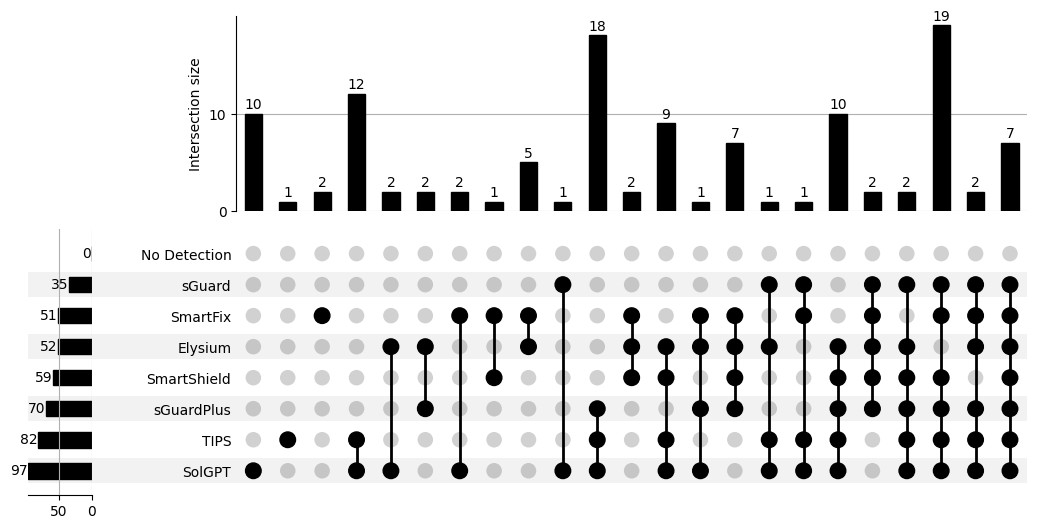

In [18]:

# OVERLAP FOR DETECTION
from matplotlib import pyplot as plt
left_list=tools+['No Detection']
df=per_c_detected
df['No Detection'] = df[left_list[:-1]].apply(lambda row: all(row == False), axis=1)

# Create a dictionary to hold the sets for each tool
tool_sets = {tool: set(df[df[tool] == True].apply(lambda x: (x['Name'], x['Category']), axis=1)) for tool in left_list}

# Prepare the data in a format suitable for the venn package
data = {}
for tool, contract_set in tool_sets.items():
    data[tool] = {f"{contract}-{category}" for contract, category in contract_set}


from upsetplot import from_contents, plot
plot(from_contents(data), show_counts="{:,}")
plt.rc('font', size=20)
print('Plotting the DETECTION OVERLAP between tools...')
# [TODO] uncomment to save the plot
#plt.savefig(os.path.join(storage_path,'plots/detection_overlap.png'), bbox_inches='tight')

Plotting the MITIGATION OVERLAP between tools...


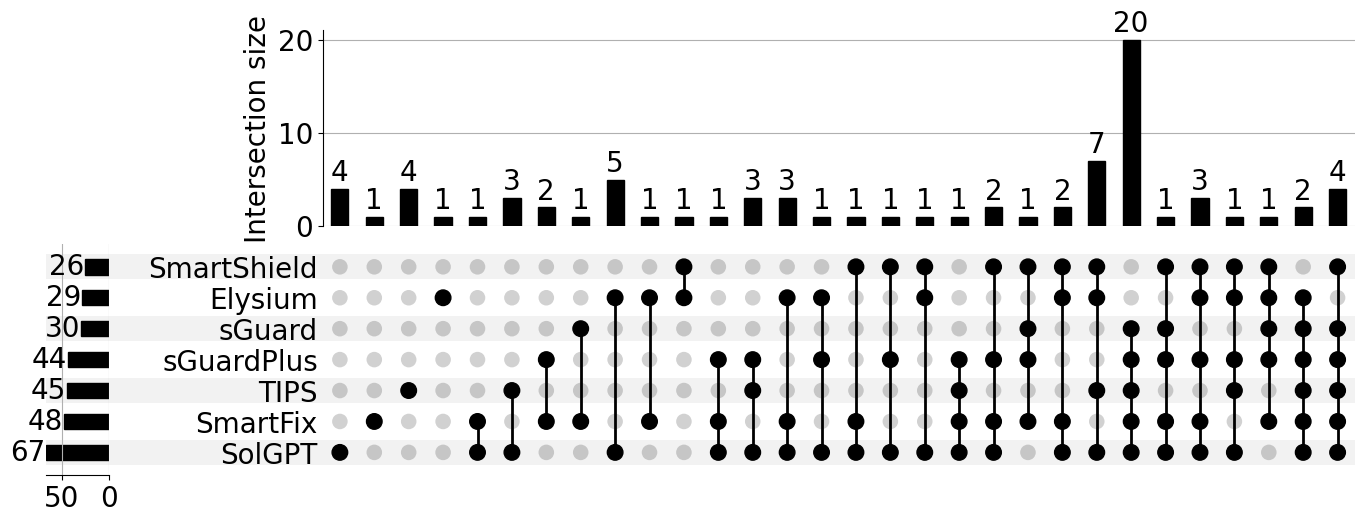

In [19]:
#Overlap for mitigation

left_list=tools#+['No Mitigation']
df=pd.read_csv(os.path.join(results_path,'smartbugs/','mitigated_exploits_contract_per_tool.csv'))
df=df.drop(['Total'], axis=1)
df['Name']=df['Contract'].apply(lambda x: x.split('/')[1])
df['Category']=df['Contract'].apply(lambda x: x.split('/')[0])
#df['No Mitigation'] = df[left_list[:-1]].apply(lambda row: all(row == False), axis=1)
df.drop(['Contract'], axis=1, inplace=True)
# Create a dictionary to hold the sets for each tool
tool_sets = {tool: set(df[df[tool] == True].apply(lambda x: (x['Name'], x['Category']), axis=1)) for tool in left_list}

# Prepare the data in a format suitable for the venn package
data = {}
for tool, contract_set in tool_sets.items():
    data[tool] = {f"{contract}-{category}" for contract, category in contract_set}
    
# OVERLAP FOR MITIGATION
from matplotlib import pyplot as plt

from upsetplot import from_contents, plot
plot(from_contents(data), show_counts="{:,}")
print('Plotting the MITIGATION OVERLAP between tools...')
#plt.suptitle("Intersection of Exploits mitigated")
# [TODO] uncomment to save the plot
#plt.savefig("../results/smartbugs/data_analysis/plots/rq3_upset.pdf")
plt.show()